##  Bank Marketing

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

### Source : https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [ ]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bank = pd.read_csv('/content/bank-additional-full.csv', sep = ';')
bank.head()

,id,date,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,01-Oct-22,56,housemaid,married,basic.4y,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93 994,-36.4,4 857,5191.0,no
1,2,01-Oct-22,57,services,married,high.school,unknown,no,no,telephone,...,1,999,0,nonexistent,1.1,93 994,-36.4,4 857,5191.0,no
2,3,01-Oct-22,37,services,married,high.school,no,yes,no,telephone,...,1,999,0,nonexistent,1.1,93 994,-36.4,4 857,5191.0,no
3,4,01-Oct-22,40,admin.,married,basic.6y,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93 994,-36.4,4 857,5191.0,no
4,5,01-Oct-22,56,services,married,high.school,no,no,yes,telephone,...,1,999,0,nonexistent,1.1,93 994,-36.4,4 857,5191.0,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              41188 non-null  int64  
 1   date            41188 non-null  object 
 2   age             41188 non-null  int64  
 3   job             41188 non-null  object 
 4   marital         41188 non-null  object 
 5   education       41188 non-null  object 
 6   default         41188 non-null  object 
 7   housing         41188 non-null  object 
 8   loan            41188 non-null  object 
 9   contact         41188 non-null  object 
 10  month           41188 non-null  object 
 11  day_of_week     41188 non-null  object 
 12  duration        41188 non-null  int64  
 13  campaign        41188 non-null  int64  
 14  pdays           41188 non-null  int64  
 15  previous        41188 non-null  int64  
 16  poutcome        41188 non-null  object 
 17  emp.var.rate    41188 non-null 

# 1. Bank client data

In [ ]:
bank_client = bank.iloc[: , 2:9]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


## 1.1. Knowing more about categorical variables

In [ ]:
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [ ]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [ ]:
print('Education:\n', bank_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [ ]:
print('Default:', bank_client['default'].unique())
print('Housing:', bank_client['housing'].unique())
print('Loan:', bank_client['loan'].unique())

Default: ['no' 'unknown' 'yes']
Housing: ['no' 'yes' 'unknown']
Loan: ['no' 'yes' 'unknown']


## 1.2. Age

In [ ]:
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())

Min age:  98
Max age:  17


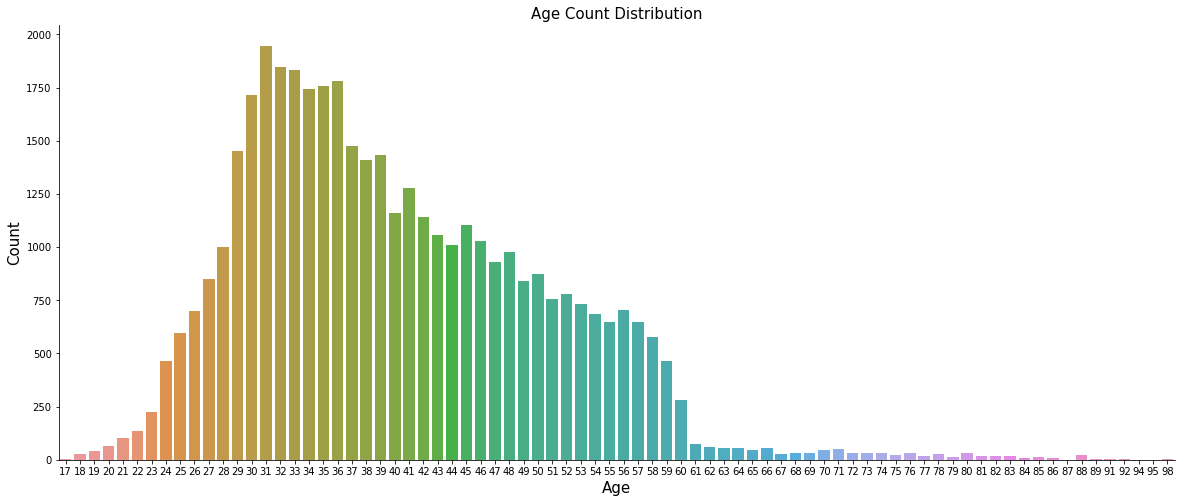

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

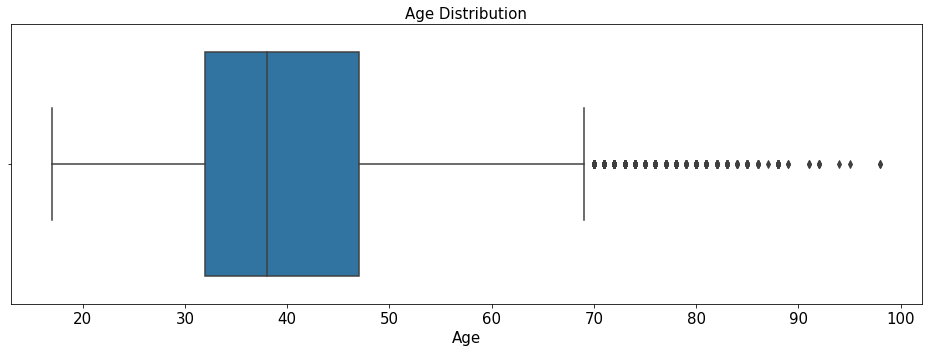

In [ ]:
fig, (ax1) = plt.subplots(nrows = 1, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [ ]:
# Quartile
print('Quartile 1: ', bank_client['age'].quantile(q = 0.25))
print('Quartile 2: ', bank_client['age'].quantile(q = 0.50))
print('Quartile 3: ', bank_client['age'].quantile(q = 0.75))
print('Quartile 4: ', bank_client['age'].quantile(q = 1.00))
    
print('Umur di atas: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'adalah outliers')

Quartile 1:  32.0
Quartile 2:  38.0
Quartile 3:  47.0
Quartile 4:  98.0
Umur di atas:  69.5 adalah outliers


## 1.3. JOBS

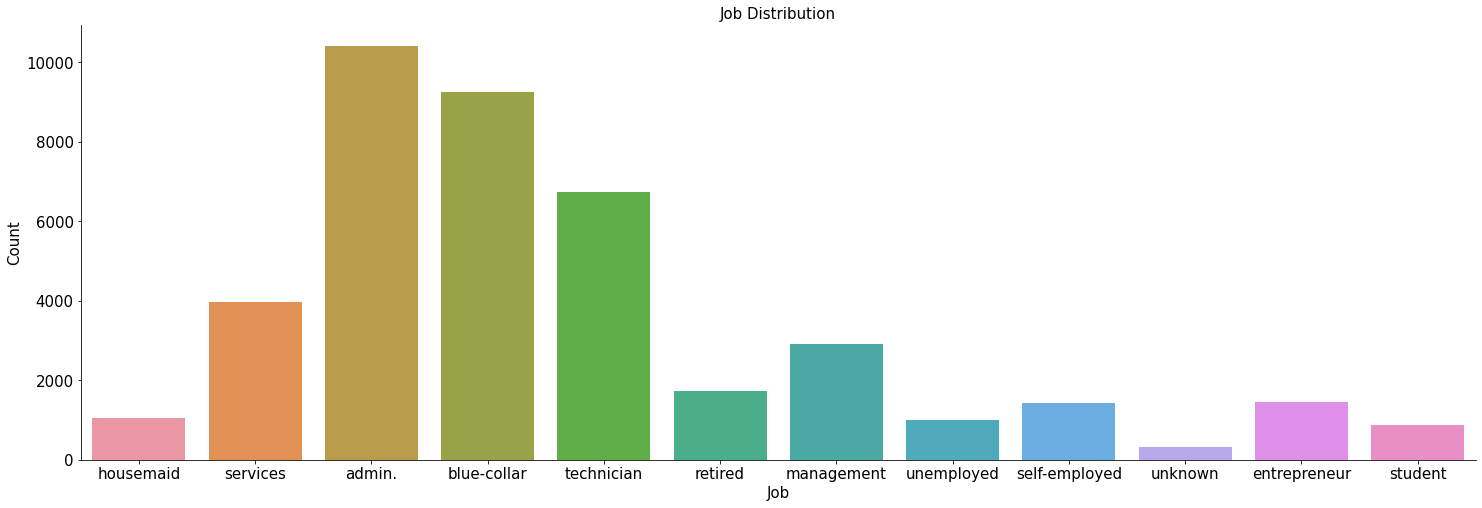

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## 1.4. MARITAL

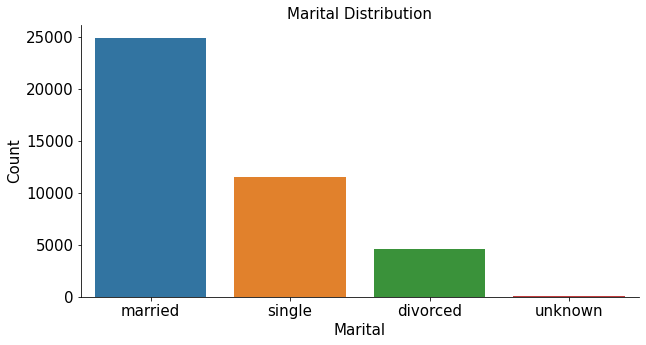

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## 1.5. EDUCATION

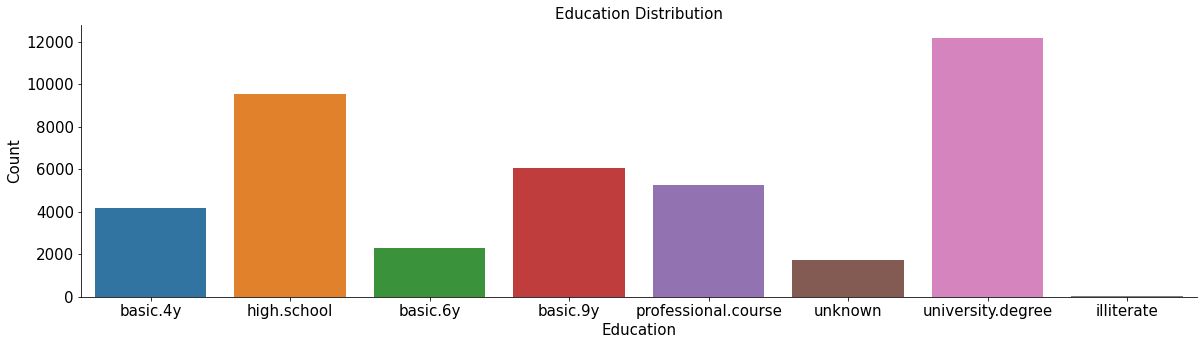

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## 1.6. DEFAULT, HOUSING, LOAN

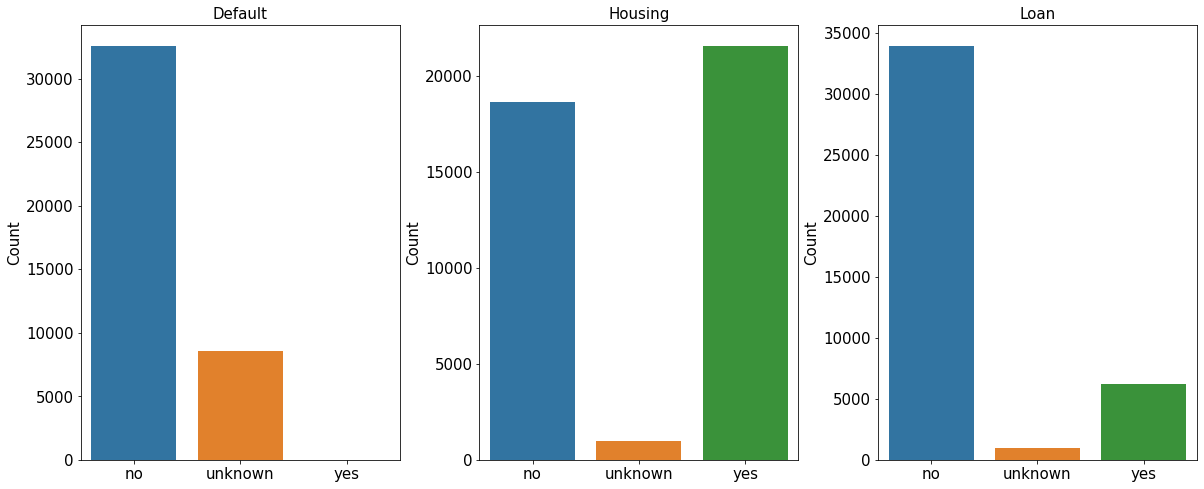

In [ ]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

# 2. Related with the last contact of the current campaign


In [ ]:
bank_related = bank.iloc[: , 9:13]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [ ]:
print("Kind of Contact: ", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: ", bank_related['month'].unique())
print("\nWhich days of week this campaing work: ", bank_related['day_of_week'].unique())

Kind of Contact:  ['telephone' 'cellular']

Which monthis this campaing work:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work:  ['mon' 'tue' 'wed' 'thu' 'fri']


## 2.2 Contact, Month, Day of Week

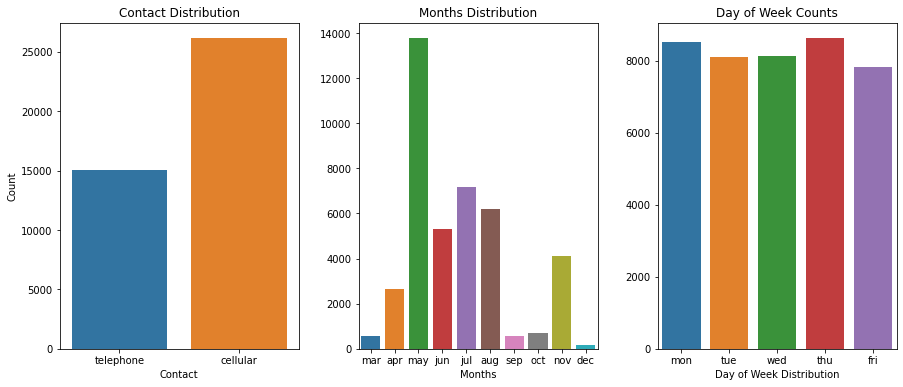

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Distribution')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Distribution')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week Distribution', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

# 3. Social and economic context attributes

In [ ]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93 994,-36.4,4 857,5191.0
1,1.1,93 994,-36.4,4 857,5191.0
2,1.1,93 994,-36.4,4 857,5191.0
3,1.1,93 994,-36.4,4 857,5191.0
4,1.1,93 994,-36.4,4 857,5191.0


# 4. Other attributes

In [ ]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [ ]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

# Correlation

In [ ]:
bank.y = bank.y.map({'no':0, 'yes':1}).astype('uint8')

In [ ]:
corr = bank.corr()
corr.style.background_gradient(cmap='PuBu')

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,nr.employed,y
id,1.000000,0.003910,0.008529,-0.093589,-0.283919,0.427815,-0.834661,-0.257615,-0.758164,0.292728
age,0.003910,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.129372,-0.017725,0.030399
duration,0.008529,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,-0.008173,-0.044703,0.405274
campaign,-0.093589,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,-0.013733,0.144095,-0.066357
pdays,-0.283919,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,-0.091342,0.372605,-0.324914
previous,0.427815,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.050936,-0.501333,0.230181
emp.var.rate,-0.834661,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.196041,0.906970,-0.298334
cons.conf.idx,-0.257615,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,1.000000,0.100513,0.054878
nr.employed,-0.758164,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.100513,1.000000,-0.354678
y,0.292728,0.030399,0.405274,-0.066357,-0.324914,0.230181,-0.298334,0.054878,-0.354678,1.000000


Fitur yang berkorelasi paling tinggi dengan target adalah durasi panggilan.

## Kesimpulan

1. Staf administrasi dan spesialis teknis paling banyak membuka deposit.
2. Konsumen yang sudah menikah lebih banyak membuka deposit.
3. Saluran komunikasi paling banyak digunakan adalah seluler.
4. Kepemilikan rumah tidak terlalu mempengaruhi hasil marketing.
5. Variabel yang paling berpengaruh dengan target adalah durasi panggilan.